In [40]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, fft2, ifft, fftshift

import matplotlib.patches as mpatches
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams["text.latex.preamble"]  = r"\usepackage{amsmath} \usepackage{amssymb} \usepackage[bitstream-charter]{mathdesign}"
mpl.rcParams["text.usetex"] = True


In [2]:
def Circ(x,y,x0,y0,a):
    shape = ((x-x0)**2 + (y-y0)**2 < (a/2)**2) 
    return shape

In [82]:
def Kagome(Ncells):
    xs = []
    ys = []
    y = - Ncells * np.sin(np.pi/3)
    for jj in range(-Ncells,Ncells+1,2):
        x = - Ncells
        for ii in range(-Ncells,Ncells):
            xs = np.append(xs,x)
            ys = np.append(ys,y)
            x += 1           
        y += 2*np.sin(np.pi/3)

    y = - (Ncells-1) * np.sin(np.pi/3)
    for jj in range(-Ncells,Ncells,4):
        x = - Ncells + np.cos(np.pi/3)
        for ii in range(-Ncells,Ncells,2):
            xs = np.append(xs,x)
            ys = np.append(ys,y)
            x += 2
        y += 4*np.sin(np.pi/3)
    y = - (Ncells-3) * np.sin(np.pi/3)
    for jj in range(-Ncells,Ncells,4):
        x = - Ncells + 1 + np.cos(np.pi/3)
        for ii in range(-Ncells,Ncells,2):
            xs = np.append(xs,x)
            ys = np.append(ys,y)
            x += 2
        y += 4*np.sin(np.pi/3)
    return xs, ys

def Triangular(Ncells):
    xs = []
    ys = []
    y = - Ncells * np.sin(np.pi/3)
    for jj in range(-Ncells,Ncells+1,2):
        x = - Ncells
        for ii in range(-Ncells,Ncells):
            xs = np.append(xs,x)
            ys = np.append(ys,y)
            x += 1           
        y += 2*np.sin(np.pi/3)
    y = - (Ncells-1) * np.sin(np.pi/3)
    for jj in range(-Ncells,Ncells,2):
        x = - Ncells + np.cos(np.pi/3)
        for ii in range(-Ncells,Ncells):
            xs = np.append(xs,x)
            ys = np.append(ys,y)
            x += 1
        y += 2*np.sin(np.pi/3)

    return xs, ys

def Honeycomb(Ncells):
    
    H = np.zeros((2*Ncells,2*Ncells+1))
    xs = []
    ys = []
    y = - Ncells * np.sin(np.pi/3)
    x_vec = np.array([1,0,0])
    y_vec = np.array([0,0,0])
    for jj in range(-Ncells,Ncells+1,2):
        x = - Ncells
        for ii in range(-Ncells,Ncells+1,3):
            xs = np.append(xs,x+x_vec)
            ys = np.append(ys,y+y_vec)
            x += 3           
        y += 2*np.sin(np.pi/3)
    y = - (Ncells-1) * np.sin(np.pi/3)
    for jj in range(-Ncells,Ncells+1,2):
        x = - Ncells+ 1 + np.cos(np.pi/3)
        for ii in range(-Ncells,Ncells+1,3):
            xs = np.append(xs,x+x_vec)
            ys = np.append(ys,y+y_vec)
            x += 3           
        y += 2*np.sin(np.pi/3)
    return xs, ys

def Lieb(Ncells):
    xs = []
    ys = []
    y = - Ncells 
    for jj in range(-Ncells,Ncells+1,2):
        x = - Ncells
        for ii in range(-Ncells,Ncells):
            xs = np.append(xs,x)
            ys = np.append(ys,y)
            x += 1           
        y += 2

    y = - Ncells     
    for jj in range(-Ncells,Ncells,4):
        x = - Ncells 
        for ii in range(-Ncells,Ncells,2):
            xs = np.append(xs,x)
            ys = np.append(ys,y)
            x += 2
        y += 4
    y = - Ncells+1     
    for jj in range(-Ncells,Ncells,2):
        x = - Ncells 
        for ii in range(-Ncells,Ncells,2):
            xs = np.append(xs,x)
            ys = np.append(ys,y)
            x += 2
        y += 2
    return xs, ys

    return xs, ys


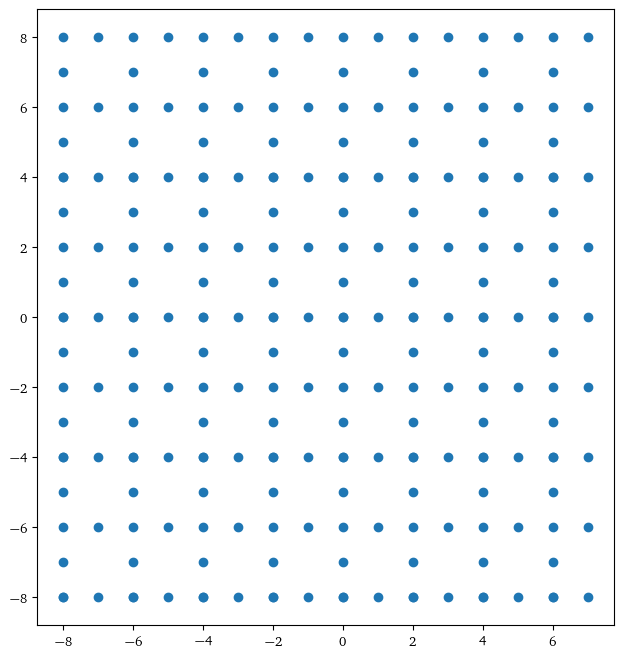

In [83]:
fig, ax = plt.subplots(1,figsize=(8, 8),dpi = 100)

ax.set_aspect(1.0)
xs, ys = Kagome(8)
xs, ys = Triangular(8)
xs, ys = Lieb(8)
#xs, ys = Honeycomb(4)

ax.scatter(xs,ys)

In [31]:
def RGB_zoom_data(data,gain,zoom):
    x_pts, y_pts  = np.shape(data) 
    xc, yc = int(x_pts/2), int(y_pts/2)
    xz, yz = int(x_pts/(2*zoom)), int(y_pts/(2*zoom))
    R = np.zeros((x_pts,y_pts))
    G = np.zeros((x_pts,y_pts))
    B = np.zeros((x_pts,y_pts))
    R += data
    G += 0.5*data
    B += 0.2*data
    R=np.clip(gain[0]*R,0.0,1.0)
    G=np.clip(gain[1]*G,0.0,1.0)
    B=np.clip(gain[2]*B,0.0,1.0)
    RGB=np.dstack((np.flipud(R.T), np.flipud(G.T), np.flipud(B.T))) # use transpose to swap image axes, flipud to origin at bottom left
    RGBzoom = RGB[xc-xz:xc+xz,yc-yz:yc+yz]
    return RGBzoom

In [32]:
def Fourier_Image(InputImage): # InputData needs 3 channels
    F=fftshift(fft2(InputImage))
    Fr=F.real
    Fi=F.imag
    F2 = Fr*Fr+Fi*Fi
    F2 /=np.max(F2)
    Gamma = 0.4
    GAF2 = F2**Gamma
    zoom = 8
    FourierImage = RGB_zoom_data(GAF2,[2.0,2.0,2.0],zoom)
    return FourierImage

In [33]:
screen = 100
xmin = -screen/2 
xmax = screen/2
ymin = -screen/2 
ymax = screen/2
dx = 0.1
dy = 0.1
X, Y = np.mgrid[xmin:xmax:dx,ymin:ymax:dy]
x_pts, y_pts = np.shape(X)

In [84]:
def Input_Image(lattice):
    screen = 100
    xmin = -screen/2 
    xmax = screen/2
    ymin = -screen/2 
    ymax = screen/2
    dx = 0.05
    dy = 0.05
    X, Y = np.mgrid[xmin:xmax:dx,ymin:ymax:dy]
    x_pts, y_pts = np.shape(X)
    
    if lattice == 'k':
        xs, ys = Kagome(7)
    elif lattice == 'h':
        xs, ys = Honeycomb(7)
    elif lattice == 'l':
        xs, ys = Lieb(7)
    InputImage = np.zeros((x_pts,y_pts))
    d = 2
    Npts = np.size(xs)
    for ii in range(0,Npts):
        InputImage += Circ(X,Y,xs[ii]*d,ys[ii]*d,1.0)
    return np.clip(InputImage,0.0,1.0)  

In [85]:
def plotting_function(ax_ref1,ax_ref2,plot_label,x_axis_label,y_axis_label):
    fs = 36
    axs[ax_ref1,ax_ref2].text(zoom_x_pts/20,zoom_x_pts/7,plot_label,fontsize = fs, color='white')
    axs[ax_ref1,ax_ref2].text(6*zoom_x_pts/20, 18.5*zoom_x_pts/20,x_axis_label,fontsize = fs, color='white')
    axs[ax_ref1,ax_ref2].text(1.5*zoom_x_pts/20, 14*zoom_x_pts/20,y_axis_label,fontsize = fs, color='white')

    axs[ax_ref1,ax_ref2].set_axis_off()
    arrow = mpatches.FancyArrow(1*zoom_x_pts/20, 19*zoom_x_pts/20,  zoom_x_pts/4, 0, width=zoom_x_pts/256, head_width = zoom_x_pts/64, 
                            head_length = zoom_x_pts/16, length_includes_head=True, color = 'white')
    axs[ax_ref1,ax_ref2].add_patch(arrow)
    arrow = mpatches.FancyArrow(1*zoom_x_pts/20, 19*zoom_x_pts/20,  0, -zoom_x_pts/4, width=zoom_x_pts/256, head_width = zoom_x_pts/64, 
                            head_length = zoom_x_pts/16, length_includes_head=True, color = 'white')
    axs[ax_ref1,ax_ref2].add_patch(arrow)

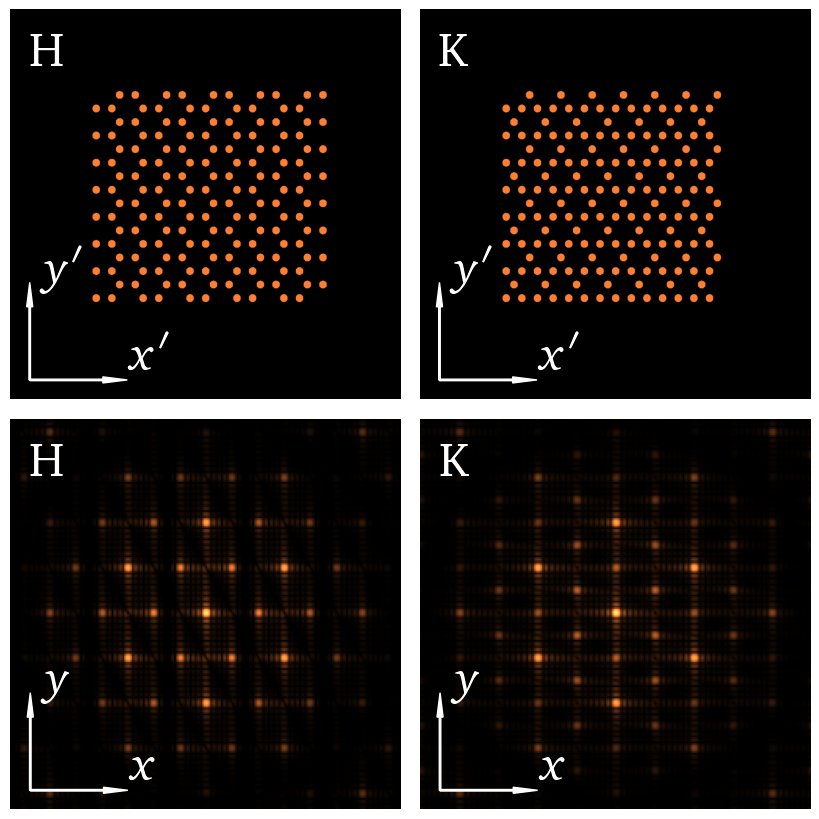

In [87]:
cols = 2
rows = 2
fig, axs = plt.subplots(rows,cols, figsize = (4*cols,4*rows),dpi=100)

InputImage = Input_Image('h')
ImageData = RGB_zoom_data(InputImage,[1.0,1.0,1.0],2.0)
axs[0,0].imshow(ImageData)
zoom_x_pts, zoom_y_pts, channels  = np.shape(ImageData)
plotting_function(0,0,'H',"$x'$","$y'$")

FImage = Fourier_Image(InputImage)
axs[1,0].imshow(FImage) 
zoom_x_pts, zoom_y_pts, channels  = np.shape(FImage)
plotting_function(1,0,'H',"$x$","$y$")

InputImage = Input_Image('k')
ImageData = RGB_zoom_data(InputImage,[1.0,1.0,1.0],2.0)
axs[0,1].imshow(ImageData)
zoom_x_pts, zoom_y_pts, channels  = np.shape(ImageData)
plotting_function(0,1,'K',"$x'$","$y'$")

FImage = Fourier_Image(InputImage)
axs[1,1].imshow(FImage)    
zoom_x_pts, zoom_y_pts, channels  = np.shape(FImage)
plotting_function(1,1,'K',"$x$","$y$")

plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.0,wspace=0.05,hspace=0.05)


In [69]:
fig.savefig('Lattices.png',bbox_inches='tight')